In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import mglearn

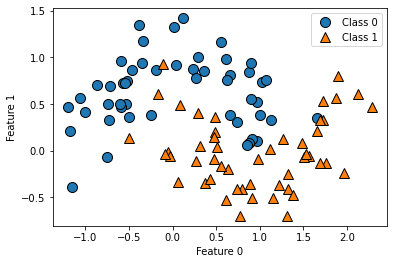

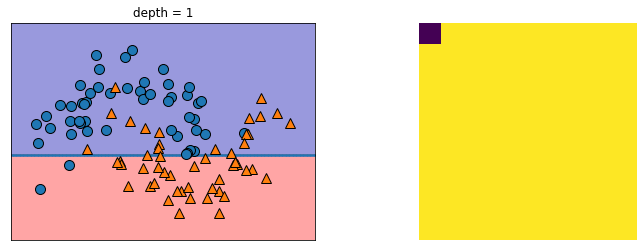

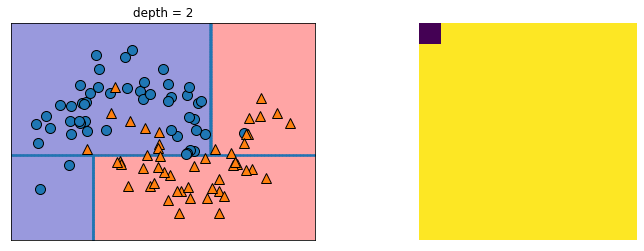

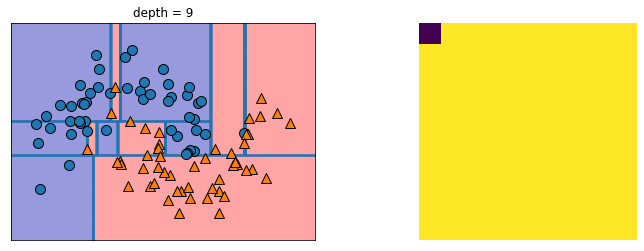

In [4]:
mglearn.plots.plot_tree_progressive()

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [7]:
cancer = load_breast_cancer()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)

In [9]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train, y_train)
print("훈련 점수 : ", tree.score(X_train, y_train))
print("테스트 점수 : ", tree.score(X_test, y_test))

훈련 점수 :  0.9882629107981221
테스트 점수 :  0.951048951048951


In [10]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

In [11]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
def plot_importances(model):
    n = cancer.data.shape[1] # 30
    plt.barh(np.arange(n), model.feature_importances_, align='center')
    plt.yticks(np.arange(n), cancer.feature_names)
    plt.xlabel('importance')
    plt.ylabel('feature')
    plt.ylim(-1, n)

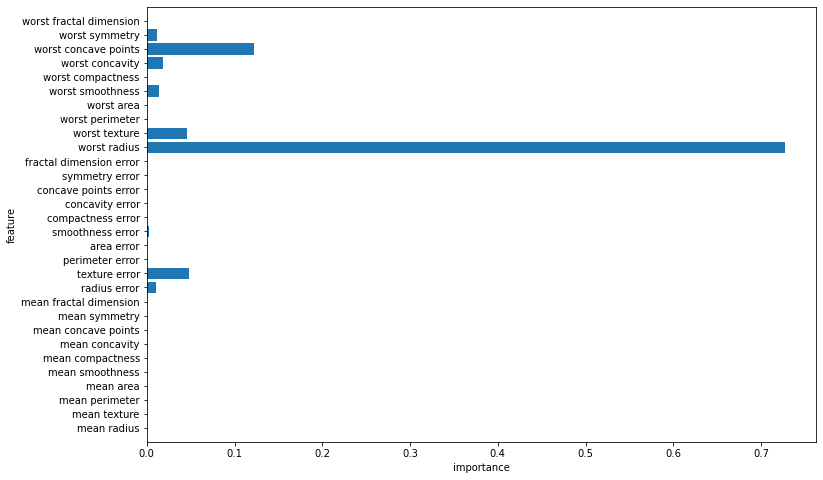

In [13]:
plt.figure(figsize=(12, 8))
plot_importances(tree)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
forest = RandomForestClassifier(n_estimators=3, random_state=0)
forest.fit(X_train, y_train)
print(f"훈련 점수 : {forest.score(X_train, y_train)*100:.2f}%")
print(f"테스트 점수 : {forest.score(X_test, y_test)*100:.2f}%")

훈련 점수 : 99.30%
테스트 점수 : 94.41%


In [16]:
forest.feature_importances_

array([0.00521945, 0.01366627, 0.04275994, 0.        , 0.00281712,
       0.        , 0.2162486 , 0.00351928, 0.00630554, 0.00799999,
       0.02363977, 0.00295798, 0.01312096, 0.23762268, 0.        ,
       0.        , 0.        , 0.0136414 , 0.00270444, 0.00313764,
       0.01636425, 0.01317822, 0.04220114, 0.01898963, 0.00310909,
       0.00435357, 0.04497982, 0.23927353, 0.02218968, 0.        ])

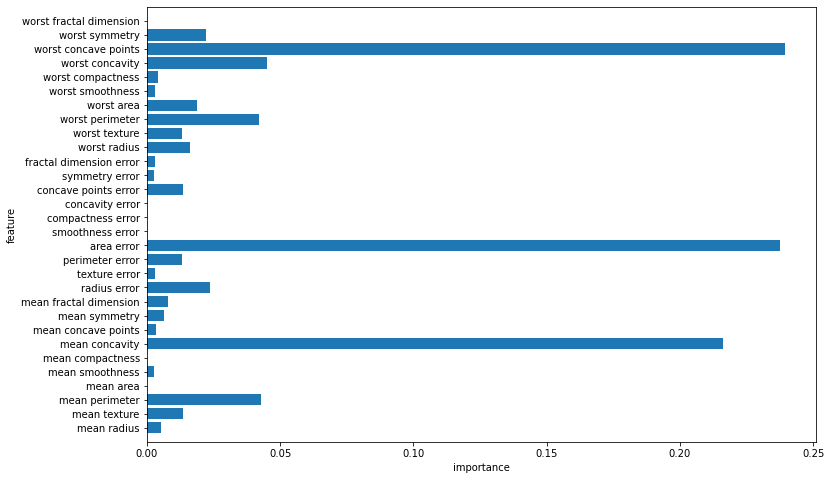

In [17]:
plt.figure(figsize=(12,8))
plot_importances(forest)